#### Prerequisite Libraries

In [ ]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.9 MB/s eta 0:00:00


#### Code and Output


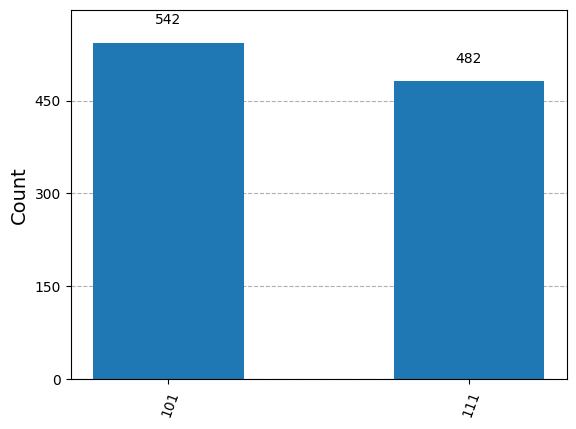

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Encode the puzzle problem with 3 qubits (represent 3 tiles)
# Use 3 qubits, where each qubit represents the state of a tile in the puzzle

n_qubits = 3
qc = QuantumCircuit(n_qubits)

# Initialize qubits into superposition to explore all possible tile configurations
qc.h(range(n_qubits))

# Step 2: Define the oracle (Mark the goal state)
# For this example, let's assume the goal state is |101⟩, i.e., tile 1 and tile 3 in position
# We mark this state using a phase flip (CZ gate)

oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 2)  # Flip the phase of |101⟩ state (this is a simple oracle for the target)

# Step 3: Define the diffusion operator (Grover's Diffusion)
def grover_diffusion(n):
    """Build a Grover diffusion operator for n qubits."""
    diffusion_circuit = QuantumCircuit(n)
    # Apply H-gates to all qubits
    diffusion_circuit.h(range(n))
    # Apply X-gates to all qubits
    diffusion_circuit.x(range(n))
    # Apply multi-controlled-Z gate (controlled phase flip)
    diffusion_circuit.h(n - 1)
    diffusion_circuit.mcx(list(range(n - 1)), n - 1)  # Multi-controlled X
    diffusion_circuit.h(n - 1)
    # Apply X-gates to all qubits
    diffusion_circuit.x(range(n))
    # Apply H-gates to all qubits
    diffusion_circuit.h(range(n))
    return diffusion_circuit

# Step 4: Combine the oracle and diffusion operator into the Grover iteration
# First, apply the oracle to mark the solution
qc.compose(oracle, inplace=True)

# Apply the diffusion operator (Grover amplification)
diffusion = grover_diffusion(n_qubits)
qc.compose(diffusion, inplace=True)

# Step 5: Measure the qubits to find the solution
qc.measure_all()

# Step 6: Run the circuit on a quantum simulator
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc).result()

# Step 7: Get the measurement results and visualize
counts = result.get_counts(qc)
plot_histogram(counts)
